## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import timeit
import matplotlib.pyplot as plt
start = timeit.default_timer()

## Data Preprocessing

### A breif introduction of Dataset
The dataset has download from Kaggle. The dataset is about Life Expectancy which mean what could be average life expectancy of the country people with the given variables details. Here dependent variable is Life expectancy and rest of the other variable is dependent variable.

In [2]:
df=pd.read_csv("Regression.csv")
df.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [3]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')


### Correlation Coefficients
Correlation coefficients are used to measure the strength of the relationship between two variables. This measures the strength and direction of a linear relationship between two variables. Values always range between -1 (strong negative relationship) and +1 (strong positive relationship).

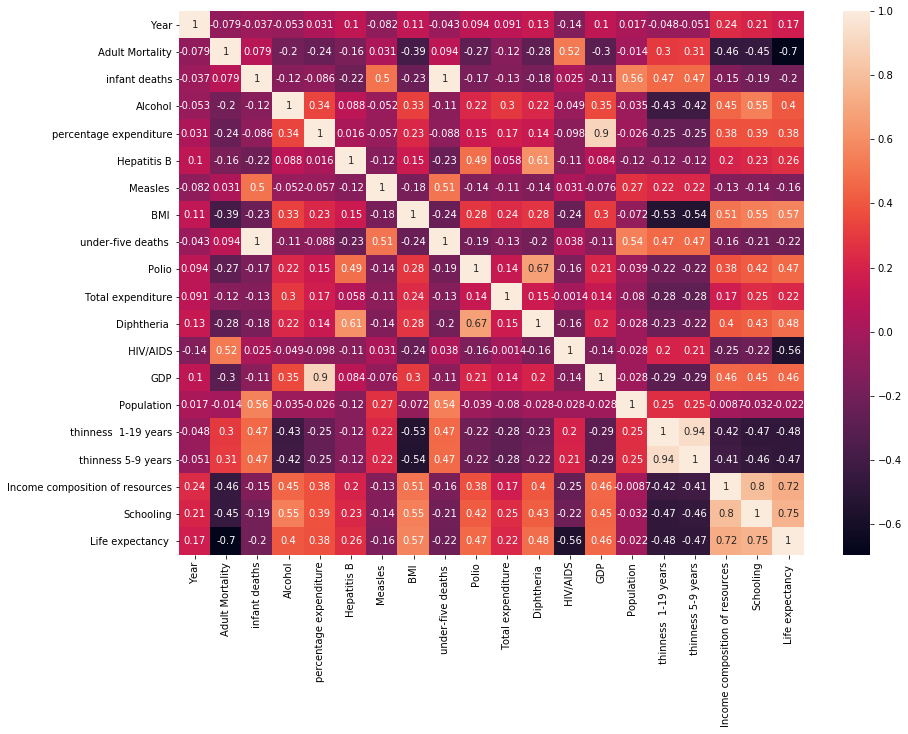

In [4]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True)

### Data Cleaning Process

In [5]:
df.isnull().sum() 

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [6]:
df.Alcohol.isnull().sum()

194

In [7]:
df.Alcohol.value_counts() 

0.01     288
0.03      15
0.04      13
0.09      12
0.02      12
        ... 
8.98       1
5.86       1
9.03       1
6.87       1
13.28      1
Name: Alcohol, Length: 1076, dtype: int64

In [8]:
df.Alcohol.fillna(0.01,inplace=True)

In [9]:
df.Alcohol.isnull().sum()

0

In [10]:
df["Hepatitis B"].value_counts()

99.0    240
98.0    210
96.0    167
97.0    155
95.0    149
       ... 
19.0      1
23.0      1
11.0      1
1.0       1
12.0      1
Name: Hepatitis B, Length: 87, dtype: int64

In [11]:
df["Hepatitis B"].fillna(99.0,inplace=True)

In [12]:
a=df.Population.mean()

In [13]:
df["Population"].fillna(a,inplace=True)

In [14]:
b=df.GDP.median()

In [15]:
df.GDP.fillna(b,inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

### Label Encoding


In [18]:
#country
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.Country.drop_duplicates())
df.Country=le.transform(df.Country)


In [19]:
#status
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.Status.drop_duplicates())
df.Status=le.transform(df.Status)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2556 non-null   int32  
 1   Year                             2556 non-null   int64  
 2   Status                           2556 non-null   int32  
 3   Adult Mortality                  2556 non-null   float64
 4   infant deaths                    2556 non-null   int64  
 5   Alcohol                          2556 non-null   float64
 6   percentage expenditure           2556 non-null   float64
 7   Hepatitis B                      2556 non-null   float64
 8   Measles                          2556 non-null   int64  
 9    BMI                             2556 non-null   float64
 10  under-five deaths                2556 non-null   int64  
 11  Polio                            2556 non-null   float64
 12  Total expenditure   

In [21]:
#dividing our data
y=df["Life expectancy "]
x=df.drop("Life expectancy ",axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

## Import Machine Learning Model

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
stop = timeit.default_timer()
print('Time :',stop-start)

Time : 3.0685976999999998


### Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor
regressortree = DecisionTreeRegressor()
regressortree.fit(X_train,y_train)
stop = timeit.default_timer()
print('Time :', stop-start)

Time : 3.1732638


### Machine Learning Model Prediction Score
To predict how much my model working accuratly I have use r-square to find its accuracy score.

In [25]:
y_pred = regressortree.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
scoredt = r2_score(y_test, y_pred)

In [27]:
y_pred = reg.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
scorelr = r2_score(y_test, y_pred)

In [29]:
print('Model Score Linear Regression :',scorelr,'\nModel Score Decision Tree :',scoredt)

Model Score Linear Regression : 0.8476289667261594 
Model Score Decision Tree : 0.9108004389573343
